In [19]:
import pandas as pd

In [36]:
#load and display dataset from csv
students_df = pd.read_csv('student_performance.csv')
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,maasai,university,free/reduced,none,20,58,78
1,female,kamba,polytechnic,free/reduced,completed,18,29,18
2,female,luo,kcpe,standard,none,35,31,59
3,male,luhya,university,standard,none,96,79,39
4,female,maasai,polytechnic,standard,completed,84,75,24


In [37]:
#view the df data types to work with
students_df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [38]:
#basic dataframe statistics
students_df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,50.089000,50.629000,49.252000
std,28.714937,28.826591,29.028213
min,0.000000,0.000000,0.000000
25%,25.000000,26.000000,24.000000
50%,51.000000,51.000000,49.000000
75%,75.000000,75.000000,74.250000
max,99.000000,99.000000,99.000000


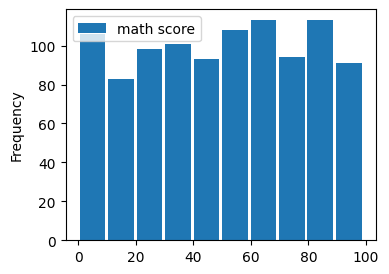

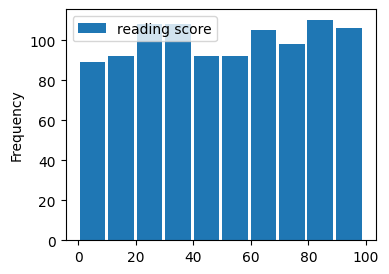

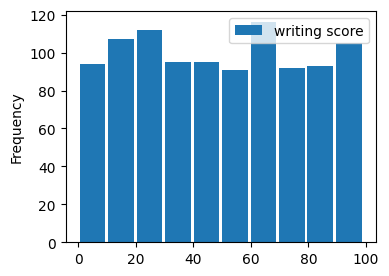

In [43]:
#histogram visualization using pandas
import matplotlib.pyplot as plt
students_df.plot.hist(column='math score',figsize=(4,3), rwidth=0.9)
students_df.plot.hist(column='reading score',figsize=(4,3), rwidth=0.9)
students_df.plot.hist(column='writing score',figsize=(4,3), rwidth=0.9)
plt.show()
#ToDo: plot using seaborn

In [40]:
#create calculated column for student score average
students_df['average score'] = students_df[['math score','reading score','writing score']].mean(axis=1).round(2)
students_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,male,maasai,university,free/reduced,none,20,58,78,52.00
1,female,kamba,polytechnic,free/reduced,completed,18,29,18,21.67
2,female,luo,kcpe,standard,none,35,31,59,41.67
3,male,luhya,university,standard,none,96,79,39,71.33
4,female,maasai,polytechnic,standard,completed,84,75,24,61.00
...,...,...,...,...,...,...,...,...,...
995,male,luo,polytechnic,standard,completed,0,6,95,33.67
996,male,kamba,kcse,standard,completed,71,18,43,44.00
997,male,maasai,polytechnic,standard,completed,61,56,72,63.00
998,female,kikuyu,kcpe,standard,none,81,33,22,45.33


In [41]:
#Calculate male students average math score
gender_group = students_df.groupby(['gender'])
print('Male students average math score:', gender_group['math score'].mean().loc['male'])

Male students average math score: 50.12903225806452


In [42]:
# Calculate % No. of students who completed the preperation test
test_prep_group = (students_df['test preparation course']).value_counts(normalize=True).mul(100).astype(str) + '%'
test_prep_group

test preparation course
none         50.1%
completed    49.9%
Name: proportion, dtype: object

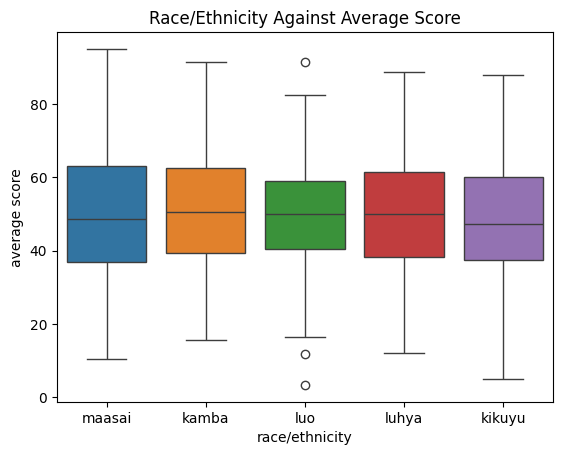

In [45]:
import seaborn as sns
#plot race against average score
sns.boxplot(data=students_df, x="race/ethnicity", y="average score", hue='race/ethnicity')
plt.title('Race/Ethnicity Against Average Score')
plt.show()